In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier

import utils


In [14]:
x = pd.read_csv("../Data_Crowdsourced_Mapping/training.csv",sep=",")
X_train = x.drop(columns=["class"])
y_train = x["class"]

In [15]:
x["class"] = pd.Categorical(x["class"])
x['code'] = x["class"].cat.codes
y_train = x["code"]

In [16]:
n_components = len(X_train.columns)

In [17]:
cls = PCA(n_components=n_components)
pcs_x = cls.fit_transform(X_train)

df_x = pd.DataFrame(pcs_x, columns=[f"PC{i}" for i in range(1, 29)])

X_dim2_train = df_x[['PC1','PC2']]

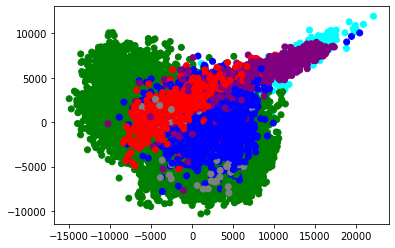

In [18]:
utils.plot_clustering(X_dim2_train,y_train)

In [19]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

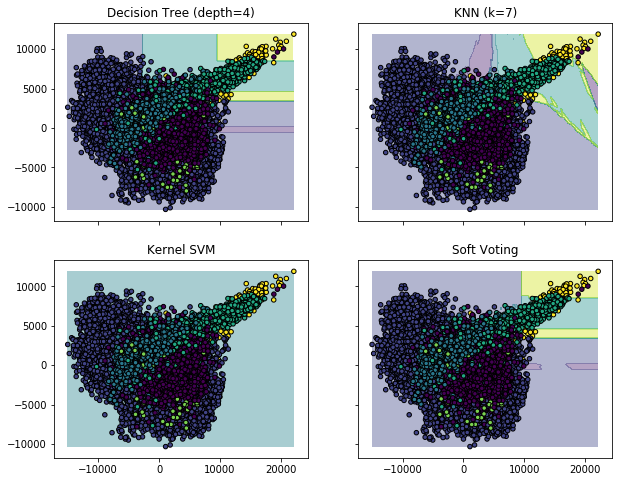

In [20]:
X = X_dim2_train.to_numpy()
y = y_train.to_numpy()

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100),
                     np.arange(y_min, y_max, 100))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

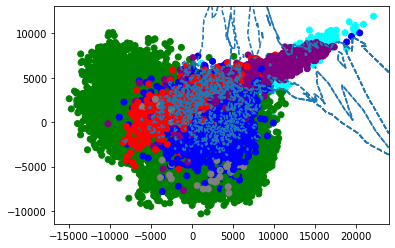

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_dim2_train, y_train)

utils.plot_clustering(X_dim2_train, y_train)
utils.add_decision_boundary(knn)
plt.show()